<a href="https://colab.research.google.com/github/ShriMLEngineer/yolov3_customTrain/blob/main/YoloV3TrainInference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ShriMLEngineer/yolov3_customTrain.git

Cloning into 'yolov3_customTrain'...
remote: Enumerating objects: 489, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 489 (delta 32), reused 210 (delta 26), pack-reused 267
Receiving objects: 100% (489/489), 5.66 MiB | 20.33 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cp /content/gdrive/MyDrive/yolov3-spp-ultralytics.pt /content/yolov3_customTrain/weights/yolov3-spp-ultralytics.pt

In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [5]:
ls

gdrive/  sample_data/  yolov3_customTrain/


In [6]:
cd yolov3_customTrain/

/content/yolov3_customTrain


In [7]:
!ls

 cfg	      models.py      results.txt        train.py	    weights
 customdata   __pycache__    test.py	       'ubdivisions=1'
 data	      README.md      ting	        utils
 detect.py    results.json   train_batch0.png   vim.exe.stackdump


In [8]:
!gdown https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/view?usp=share_link

/usr/local/lib/python3.9/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/view?usp=share_link
To: /content/yolov3_customTrain/view?usp=share_link
72.2kB [00:00, 41.6MB/s]


In [51]:
import torch
print(torch.cuda.is_available())


True


In [52]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(epochs=300, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-26 12:13:55.020185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 12:13:55.947342: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or direc

In [61]:
!python detect.py --conf-thres 0.04 --output out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='out_out', img_size=512, conf_thres=0.04, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 4.49203e+07 parameters, 4.49203e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/100 data/customdata/images/bat1.jpg: 384x512 Done. (0.026s)
image 2/100 data/customdata/images/bat10.jpg: 384x512 Done. (0.024s)
image 3/100 data/customdata/images/bat11.jpg: 384x512 Done. (0.024s)
image 4/1

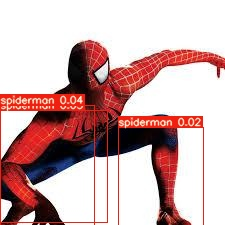

In [62]:
Image(filename='out_out/spiderman5.jpg', width=300)